# Проект: телекоммуникации

**Описание проекта**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.


**Описание услуг**

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Файл contract_new.csv
- customerID — идентификатор абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

Файл personal_new.csv
- customerID — идентификатор пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

Файл internet_new.csv
- customerID — идентификатор пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

Файл phone_new.csv
- customerID — идентификатор пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.


**План работы**
- **Шаг 1. Загрузка данных**

Загрузка данных и их первичный осмотр.

- **Шаг 2. Исследовательский анализ и предобработка данных** 

Исследовательский анализ каждого датафрейма и при необходимости выполнение предобработки. Выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

- **Шаг 3. Объединение данных**

Объединение выбранных признаков в один датафрейм по ключу.

- **Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма**

Выполнение исследовательского анализа объединённого датафрейма, визуализация распределения признаков и при необходимости выполнение предобработки. Проведение корреляционного анализа (можно использовать не только имеющиеся признаки, но и генерировать новые)

- **Шаг 5. Подготовка данных**

Выполнение подготовки данных для обучения модели. Разделение данных на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.

- **Шаг 6. Обучение моделей машинного обучения**

Обучение как минимум двух моделей. Хотя бы для одной из них подбор как минимум двух гиперпараметров.

- **Шаг 7. Выбор лучшей модели**

Выбор лучшей модели и проверка её качества на тестовой выборке.

- **Шаг 8. Общий вывод и рекомендации заказчику**

Общий вывод о проделанной работе: описание основных этапов работы, полученные результаты и рекомендации для бизнеса.

## Шаг 1. Загрузка данных

In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
print(sklearn.__version__)

1.6.1


In [4]:
pip install --upgrade scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import math
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from scipy.stats import mode

from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

from catboost import CatBoostClassifier
import lightgbm as lgb

from phik import phik_matrix, resources, report
from phik.report import plot_correlation_matrix

In [6]:
#константы
RANDOM_STATE = 12345
test_size = 0.25

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
#загрузка файла contract_new
contract_new = pd.read_csv('/datasets/contract_new.csv')
contract_new.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [9]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
contract_new.duplicated().sum()

0

In [11]:
#загрузка файла internet_new
internet_new = pd.read_csv('/datasets/internet_new.csv')
internet_new.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
internet_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
internet_new.duplicated().sum()

0

In [14]:
#загрузка файла personal_new
personal_new = pd.read_csv('/datasets/personal_new.csv')
personal_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [15]:
personal_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [16]:
personal_new.duplicated().sum()

0

In [17]:
#загрузка файла phone_new
phone_new = pd.read_csv('/datasets/phone_new.csv')
phone_new.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [18]:
phone_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [19]:
phone_new.duplicated().sum()

0

Промежуточный вывод: 
- В загруженных данных не обнаружено пропусков и дубликатов.
- Столбец customerID необходимо переименовать в CustomerID для единообразия.
- Столбцы BeginDate и EndDate требуют приведения к формату дат.
- В столбце EndDate значение No указывает на активных пользователей и должно быть преобразовано в фиксированную дату (01.02.2020) после выделения целевого признака.
- Столбец TotalCharges содержит числовые данные, но требует приведения к соответствующему числовому формату.

При объединении всех 4 таблиц необходимо учитывать, что не все пользователи используют сразу все услуги. Пропуски в объединённых данных следует заполнить соответствующими значениями.

## Шаг 2. Исследовательский анализ и предобработка данных

In [20]:
#замена названий столбцов
contract_new = contract_new.rename(columns={'customerID': 'CustomerID'}) 
contract_new.columns.values

array(['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], dtype=object)

In [21]:
#замена названий столбцов
personal_new = personal_new.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})
personal_new.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype=object)

In [22]:
#замена названий столбцов
internet_new = internet_new.rename(columns={'customerID': 'CustomerID'})
internet_new.columns.values

array(['CustomerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'], dtype=object)

In [23]:
#замена названий столбцов
phone_new = phone_new.rename(columns={'customerID': 'CustomerID'})
phone_new.columns.values

array(['CustomerID', 'MultipleLines'], dtype=object)

Добавим новый столбец Churn, который будет указывать, ушел ли клиент от услуг. Если в столбце EndDate указано значение "No", это значит, что клиент остался, и целевой признак примет значение 0. Если указана дата ухода, то целевой признак будет равен 1.

In [24]:
contract_new['Churn'] = (contract_new['EndDate'] != 'No').astype(int)
contract_new.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


In [25]:
#заменим No в EndDate на дату выгрузки таблицы 
contract_new['EndDate'] = contract_new['EndDate'].replace(['No'], ['2020-02-01'])
contract_new[contract_new['EndDate'] == 'No'].shape[0]

0

In [26]:
#поменяем тип данных в столбцах с датами
contract_new['BeginDate'] = pd.to_datetime(contract_new['BeginDate'], format='%Y-%m-%d')
contract_new['EndDate'] = pd.to_datetime(contract_new['EndDate'], format='%Y-%m-%d')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Churn             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 495.3+ KB


In [27]:
#вычисление разницы в днях - сколько дней абонент пользовался услугами - длительность контракта
contract_new['Days'] = (contract_new['EndDate'] - contract_new['BeginDate']).dt.days

contract_new.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,0,153


In [28]:
#заменим тип данных на числовой
contract_new['TotalCharges'] = pd.to_numeric(contract_new['TotalCharges'], errors='coerce')

In [29]:
#посмотрим на количество пропусков после изменения типа даты
contract_new['TotalCharges'].isna().sum()

11

In [30]:
contract_new[contract_new['TotalCharges'].isna()]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


Во всех пропусках клиенты подключены в день выгрузки базы, условимся, что их расходы равны значению в MonthlyCharges

In [31]:
contract_new['TotalCharges'] = contract_new['TotalCharges'].fillna(contract_new['MonthlyCharges'])

    Посмотрим файл contract_new.csv — информация о договоре;

In [32]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   Days              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [33]:
contract_new.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


In [34]:
#посмотрим на уникальные значения типа оплаты
contract_new['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [35]:
#посмотрим на уникальные значения столбца "электронный расчётный лист"
contract_new['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
#посмотрим на уникальные значения типа платежа 
contract_new['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

    Посмотрим файл personal_new.csv — персональные данные клиента;

In [37]:
personal_new.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [38]:
#уникальные значения во всех столбцах
columns = [
    "Gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
]

for column in columns:
    unique_values = personal_new[column].unique()
    print(f"{column}: {unique_values}")

Gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']


In [39]:
personal_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     7043 non-null   object
 1   Gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


    Посмотрим файл internet_new.csv — информация об интернет-услугах;

In [40]:
internet_new.head()

,CustomerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [41]:
#уникальные значения во всех столбцах
columns = [
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for column in columns:
    unique_values = internet_new[column].unique()
    print(f"{column}: {unique_values}")

InternetService: ['DSL' 'Fiber optic']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']


In [42]:
internet_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


    Посмотрим файл phone_new.csv — информация об услугах телефонии.

In [43]:
phone_new.head()

,CustomerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [44]:
#уникальные значения
phone_new['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
phone_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Промежуточный вывод:

Типы данных корректны, неявные дубликаты не найдены, названия в едином стиле, более детально посмотрим данные после объядинения

## Шаг 3. Объединение данных

In [46]:
churn_df = personal_new.merge(contract_new, on ='CustomerID', how='inner')
churn_df = churn_df.merge(internet_new, on ='CustomerID', how = 'outer')
churn_df = churn_df.merge(phone_new, on ='CustomerID', how = 'outer')
churn_df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Fiber optic,No,No,No,No,No,No,No


In [47]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   Gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           7043 non-null   datetime64[ns]
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  Churn             7043 non-null   int64         
 13  Days              7043 non-null   int64         
 14  InternetService   5517 n

In [48]:
#посмотрим на уникальность всех id
churn_df['CustomerID'].is_unique

True

In [49]:
#заменим индекс на CustomerID
churn_df = churn_df.set_index('CustomerID')

Пропуски в InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies и MultipleLines означают, что услуги не подключены. Замена всех пропусков на 'No' не позволяет отличить клиентов, которые осознанно отказались от конкретной услуги, от тех, кто вообще не пользуется пакетом. Это может привести к путанице в анализе данных или обучении модели, так как разные причины отсутствия услуги будут представлены одним и тем же значением. 

Заменим пропуски на "No internet" и "No phone"

In [50]:
for column in ('InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'):
    churn_df[column] = churn_df[column].fillna('No Internet')

In [51]:
churn_df['MultipleLines'] = churn_df['MultipleLines'].fillna('No phone')

In [52]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Gender            7043 non-null   object        
 1   SeniorCitizen     7043 non-null   int64         
 2   Partner           7043 non-null   object        
 3   Dependents        7043 non-null   object        
 4   BeginDate         7043 non-null   datetime64[ns]
 5   EndDate           7043 non-null   datetime64[ns]
 6   Type              7043 non-null   object        
 7   PaperlessBilling  7043 non-null   object        
 8   PaymentMethod     7043 non-null   object        
 9   MonthlyCharges    7043 non-null   float64       
 10  TotalCharges      7043 non-null   float64       
 11  Churn             7043 non-null   int64         
 12  Days              7043 non-null   int64         
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity

## Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма

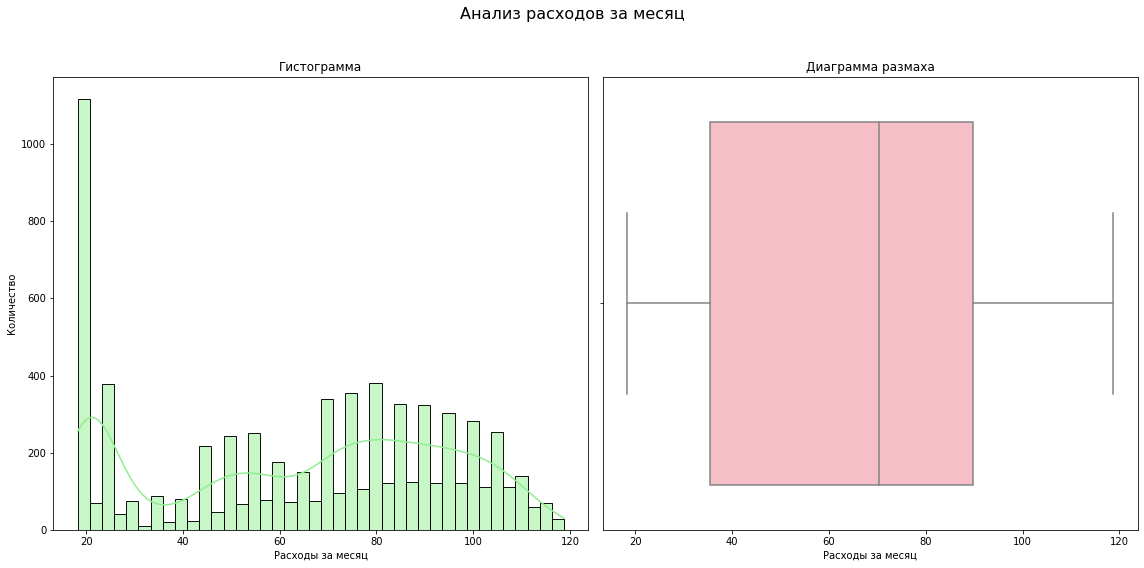

In [53]:
#проанализируем расходы клиентов за месяц
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#гистограмма
sns.histplot(data=churn_df, x='MonthlyCharges', ax=axs[0], kde=True, bins=40, color='lightgreen')
axs[0].set_xlabel('Расходы за месяц')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')

#диаграмма размаха
sns.boxplot(data=churn_df, x='MonthlyCharges', ax=axs[1], color='lightpink')
axs[1].set_xlabel('Расходы за месяц')
axs[1].set_title('Диаграмма размаха')

fig.suptitle('Анализ расходов за месяц', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

У большинства пользователей минимальные ежемесячные расходы, что показывает пик в самом начале графика. Затем количество пользователей увеличивается, с вершиной около 80, после чего снова следует снижение. Медиана расхода находится примерно на уровне 70, а основная масса значений сосредоточена в диапазоне от 35 до 90.

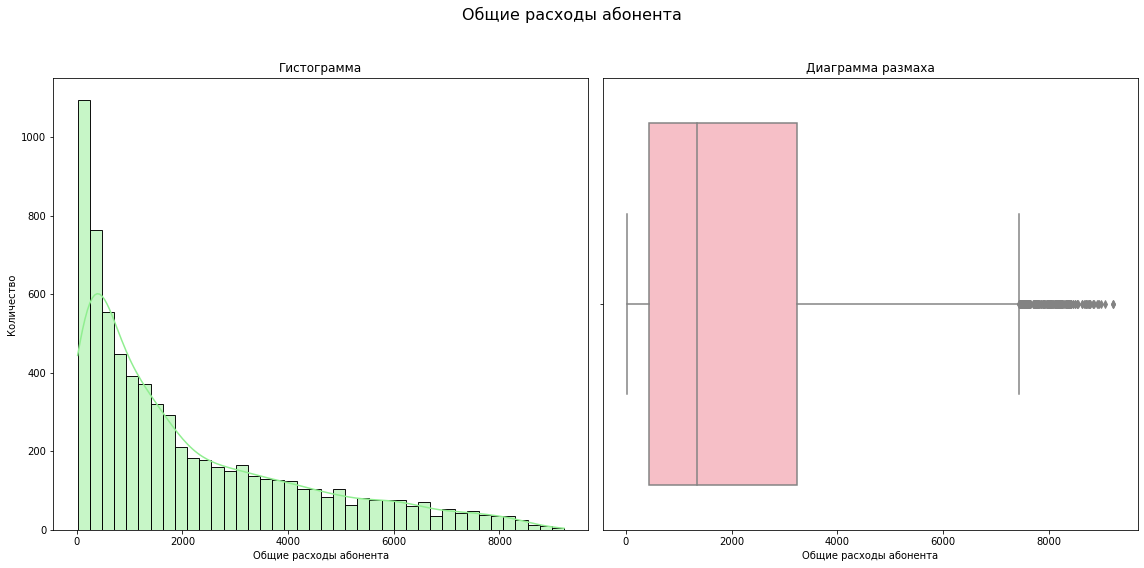

In [54]:
#проанализируем общие расходы абонента
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#гистограмма
sns.histplot(data=churn_df, x='TotalCharges', ax=axs[0], kde=True, bins=40, color='lightgreen')
axs[0].set_xlabel('Общие расходы абонента')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')

#диаграмма размаха
sns.boxplot(data=churn_df, x='TotalCharges', ax=axs[1], color='lightpink')
axs[1].set_xlabel('Общие расходы абонента')
axs[1].set_title('Диаграмма размаха')

fig.suptitle('Общие расходы абонента', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Распределение имеет убывающий характер в диапазоне от 0 до 8000, с постепенным снижением частоты к более высоким значениям. Выбросы отсутствуют, медиана расположена около 1600, при этом основная часть значений варьируется от 300 до 3700. Такое распределение отражает накопительный характер показателя: чем дольше клиент остаётся с договором, тем выше становится сумма его затрат.

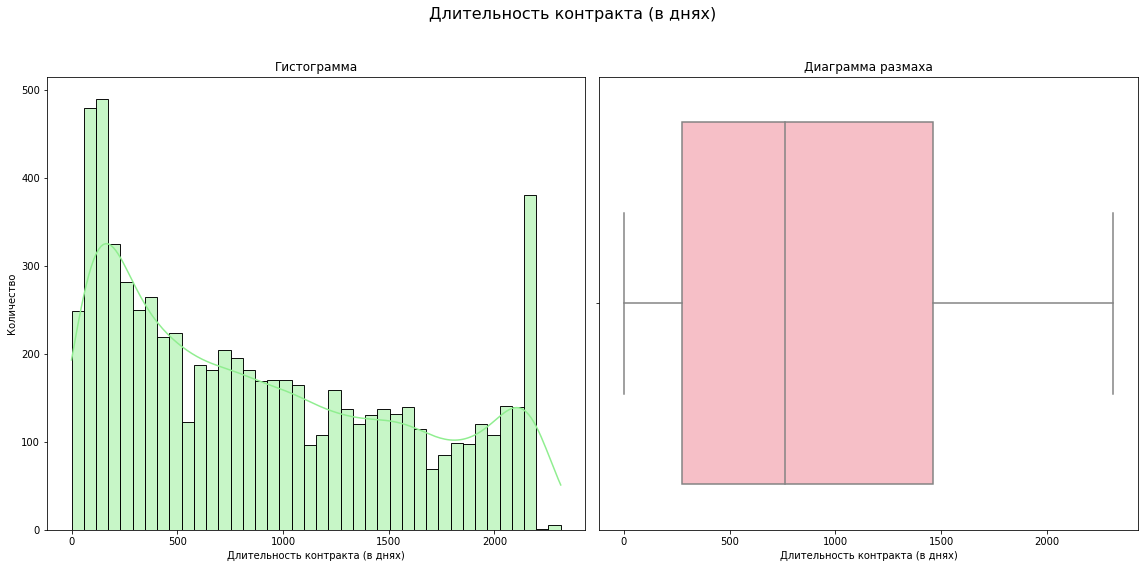

In [55]:
#проанализируем длительность контракта 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#гистограмма
sns.histplot(data=churn_df, x='Days', ax=axs[0], bins=40, kde=True, color='lightgreen')
axs[0].set_xlabel('Длительность контракта (в днях)')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')

#диаграмма размаха
sns.boxplot(data=churn_df, x='Days', ax=axs[1], color='lightpink')
axs[1].set_xlabel('Длительность контракта (в днях)')
axs[1].set_title('Диаграмма размаха')

fig.suptitle('Длительность контракта (в днях)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Пики распределяются на промежутках 0-200 дней (новые пользователи) и более 2000 дней (долгосрочные пользователи). Если новые пользователи не удовлетворены услугами, они уходят, что приводит к падению числа пользователей около 500 дней. В то же время, долгосрочные пользователи, довольные сервисом, продолжают пользоваться услугами, что обуславливает стабильность на более поздних этапах.

In [56]:
#функция для построения круговых диаграмм категориальных столбов
palette_color = sns.color_palette('pastel')

def vis_categories(categories, df, cols=3):
  
    rows = math.ceil(len(categories) / cols) 
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 6 * rows))
    axes = axes.flatten() 

    for i, name in enumerate(categories):
        ax = axes[i]
        df[name].value_counts().plot(
            kind='pie',
            autopct='%1.0f%%',
            title=name,
            colors=palette_color,
            ax=ax
        )
        ax.set_ylabel('') 
        
   
    for j in range(len(categories), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [57]:
#список категориальных столбцов
categories = [
    'Type', 
    'PaperlessBilling', 
    'PaymentMethod', 
    'Gender', 
    'SeniorCitizen', 
    'Partner', 
    'Dependents', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'MultipleLines', 
    'Churn'
]

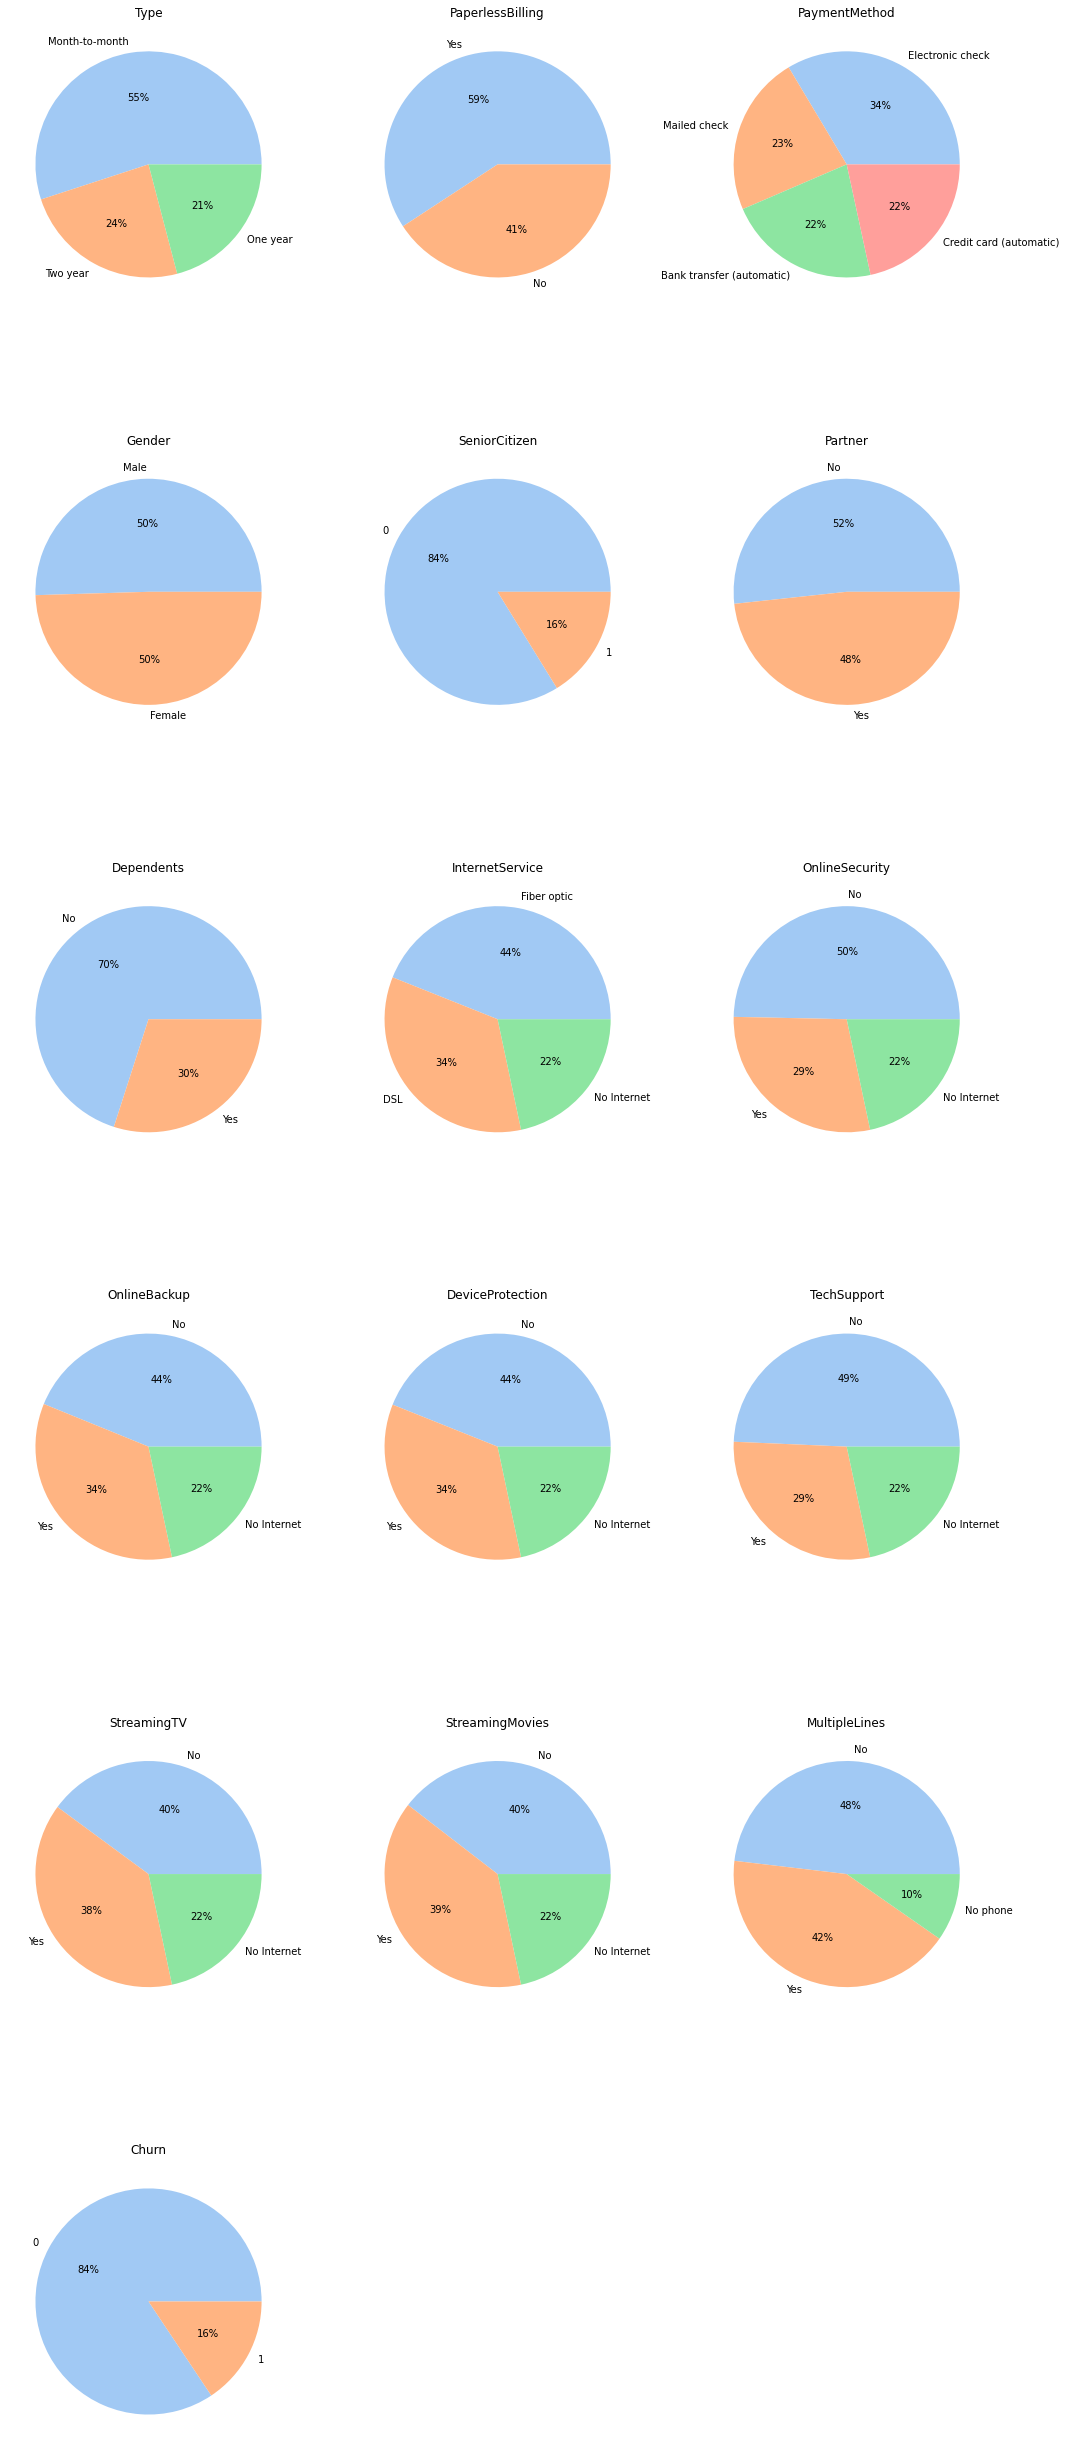

In [58]:
#круговые диаграммы категориальных данных
vis_categories(categories, churn_df, cols=3)

- Большинство пользователей оплачивают услуги ежемесячно (более половины).
- Методы оплаты распределены почти поровну: 34% пользователей предпочитают электронный чек, остальные 22-23% выбирают другие способы.
- Соотношение мужчин и женщин среди пользователей одинаковое.
- 16% пользователей являются пенсионерами.
- Распределение по наличию партнёра почти равное.
- У 70% абонентов нет детей.
- 22% пользователей не подключены к интернету, а типы подключения (к интернету и телефону) распределены почти поровну.
- 10% пользователей не имеют пакета с телефонными услугами, и почти половина из них не использует несколько телефонных линий.
- Графики и соотношения классов были проанализированы, выбросы и аномалии не обнаружены.


Удалим ненужные для обучения столбцы BeginDate и EndDate

In [59]:
churn_df = churn_df.drop(['BeginDate', 'EndDate'], axis=1) 

In [60]:
#посмотрим на дисбаланс классов
churn_df['Churn'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: Churn, dtype: float64

Наблюдается дисбаланс классов целевого признака, соотношение составляет 84% на 16%. В данной работе будет использоваться метрика ROC-AUC, которая не чувствительна к дисбалансу, но мы все равно учтем дисбаланс при обучении моделей. 

Проанализирируем портерт клиента в разрезе оттока - сделаем сводную таблицу с churn по столбцам и признаками по строкам, на пересечении - агрегаты: среднее по непрерывным признакам, медиана по дискретным и мода по категориальным. Также добавим столбец с относительной разницей для непрерывных признаков, для остальных признаков этот столбец заполним нулями. 

In [61]:
#разделение признаков по типам
continuous_features = ['MonthlyCharges', 'TotalCharges', 'Days']
categorical_features = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type', 
    'PaperlessBilling', 'PaymentMethod', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

#функция для расчета относительных различий для непрерывных признаков
def calculate_relative_difference(group1, group2):
    return (group1.mean() - group2.mean()) / group2.mean() if group2.mean() != 0 else np.nan

rows = []

for feature in continuous_features:
    no_churn_mean = churn_df[churn_df['Churn'] == 0][feature].mean()
    churn_mean = churn_df[churn_df['Churn'] == 1][feature].mean()
    relative_diff = calculate_relative_difference(
        churn_df[churn_df['Churn'] == 1][feature],
        churn_df[churn_df['Churn'] == 0][feature]
    )
    rows.append([feature, churn_mean, no_churn_mean, relative_diff])

for feature in categorical_features:
    no_churn_mode = churn_df[churn_df['Churn'] == 0][feature].mode()[0]
    churn_mode = churn_df[churn_df['Churn'] == 1][feature].mode()[0]
    rows.append([feature, churn_mode, no_churn_mode, 0])


pivot_table = pd.DataFrame(
    rows, 
    columns=['Признак', 'Отток', 'Не отток', 'Относительная разница']
)

pivot_table

,Признак,Отток,Не отток,Относительная разница
0,MonthlyCharges,75.546004,62.763455,0.203662
1,TotalCharges,2371.377275,2067.943095,0.146732
2,Days,924.86376,893.681084,0.034892
3,Gender,Male,Male,0.000000
4,SeniorCitizen,0,0,0.000000
5,Partner,Yes,No,0.000000
6,Dependents,No,No,0.000000
7,Type,Month-to-month,Month-to-month,0.000000
8,PaperlessBilling,Yes,Yes,0.000000
9,PaymentMethod,Electronic check,Electronic check,0.000000


Наибольшее влияние на вероятность оттока оказывают:
Высокий уровень ежемесячных платежей (+20.37%).
Большая накопленная сумма общих платежей (+14.67%).
Ушедшие клиенты также склонны использовать больше дополнительных услуг (например, OnlineBackup, StreamingTV, StreamingMovies).
Однако, важным фактором оттока может быть тип контракта — большинство клиентов, как остающихся, так и уходящих, имеют контракт "Month-to-month". Возможно, клиенты с более долгосрочными контрактами менее склонны к оттоку.
Категориальные признаки, такие как наличие партнера и зависимых, также демонстрируют различия между группами

### Матрица корреляции

In [62]:
#создание матрицы корреляции Phik
phik_overview = churn_df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Days'])
phik_overview

,Gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Days,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
Gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009025,0.000000,0.008581,0.000000,0.000000,0.001460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SeniorCitizen,0.000000,1.000000,0.016992,0.324576,0.086231,0.242133,0.292725,0.304691,0.137707,0.086159,0.063315,0.160702,0.127319,0.109995,0.110177,0.135283,0.111714,0.113778,0.087925
Partner,0.000000,0.016992,1.000000,0.652122,0.179736,0.013218,0.243008,0.203237,0.381042,0.226688,0.453688,0.000000,0.091202,0.092012,0.100092,0.076326,0.082251,0.077506,0.086249
Dependents,0.000000,0.324576,0.652122,1.000000,0.147680,0.172593,0.224903,0.184213,0.082134,0.046871,0.198729,0.108463,0.117219,0.097766,0.094597,0.109753,0.088193,0.084684,0.011198
Type,0.000000,0.086231,0.179736,0.147680,1.000000,0.106860,0.277462,0.388266,0.468471,0.094015,0.634155,0.505187,0.636884,0.581660,0.631531,0.671629,0.549564,0.553556,0.244410
PaperlessBilling,0.000000,0.242133,0.013218,0.172593,0.106860,1.000000,0.370495,0.467783,0.203144,0.083398,0.026799,0.231438,0.208320,0.195321,0.195687,0.200621,0.204717,0.202241,0.099953
PaymentMethod,0.000000,0.292725,0.243008,0.224903,0.277462,0.370495,1.000000,0.399536,0.335175,0.214832,0.350964,0.323886,0.315799,0.293413,0.297923,0.317713,0.284531,0.285525,0.174849
MonthlyCharges,0.009025,0.304691,0.203237,0.184213,0.388266,0.467783,0.399536,1.000000,0.711161,0.225925,0.387579,0.918980,0.812633,0.818858,0.827318,0.816603,0.864642,0.863641,0.710101
TotalCharges,0.000000,0.137707,0.381042,0.082134,0.468471,0.203144,0.335175,0.711161,1.000000,0.304287,0.847414,0.489674,0.516119,0.550225,0.558342,0.527587,0.555337,0.554238,0.467339
Churn,0.008581,0.086159,0.226688,0.046871,0.094015,0.083398,0.214832,0.225925,0.304287,1.000000,0.374569,0.056621,0.058659,0.089704,0.085608,0.051537,0.078545,0.086577,0.105101


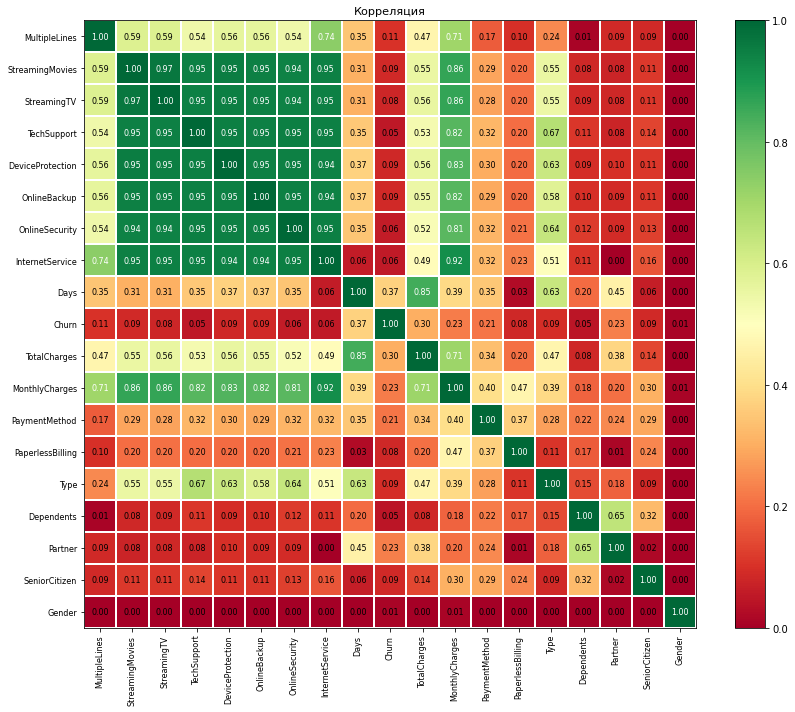

In [63]:
#построение тепловой карты матрицы корреляции Phik
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1,
    title=r"Корреляция",
    fontsize_factor=0.8,
    figsize=(12, 10)
)
plt.tight_layout()
plt.show()

Мультиколлинеарность не представляет проблемы для древесных и бустинговых моделей. Рассмотрим вариант создания двух датасетов с и без этого признака в зависимости от модели. Для логической регрессии, где предсказания основываются на линейной комбинации признаков, буду использовать датасет без мультиколлинеарности. Мультиколлинеарность возникает, когда два или более признаков сильно коррелируют друг с другом
Для избавления от нее необходимо удалить один из сильно коррелирующих признаков (корреляция выше 0.8), исключим MonthlyCharges, TotalCharges, TechSupport, StreamingMovies, DeviceProtection, OnlineSecurity, OnlineBackup, InternetService. Признак Gender не несет значимости, исключим его тоже при обучении модели. 

In [64]:
#удаляем признаки для churn_df1
churn_df1 = churn_df.drop(['MonthlyCharges', 'Gender'], axis=1) 

In [65]:
#удаляем признаки для churn_df1
churn_df1 = churn_df1.drop(['TotalCharges', 
                           'TechSupport', 
                           'StreamingMovies', 
                           'DeviceProtection',
                           'OnlineSecurity', 
                           'OnlineBackup', 
                           'InternetService'
                          ], axis=1) 

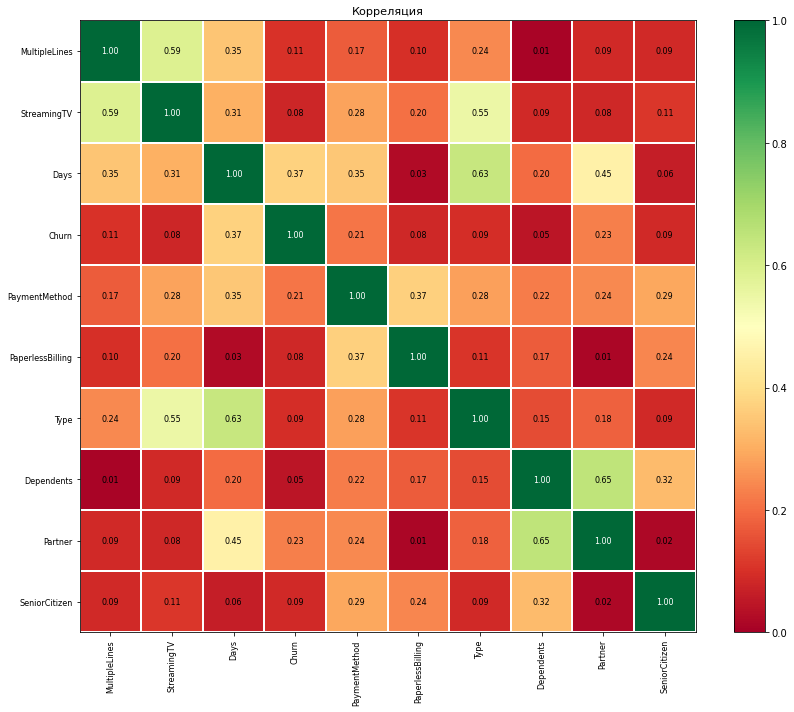

In [66]:
phik_overview2 = churn_df1.phik_matrix(interval_cols=['Days'])
plot_correlation_matrix(
    phik_overview2.values,
    x_labels=phik_overview2.columns,
    y_labels=phik_overview2.index,
    vmin=0, vmax=1,
    title=r"Корреляция",
    fontsize_factor=0.8,
    figsize=(12, 10)
)
plt.tight_layout()
plt.show()

## Шаг 5. Подготовка данных

In [67]:
#разделение на тренировочную и тестовую выборки
X1 = churn_df1.drop('Churn', axis=1)
y1 = churn_df1['Churn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=test_size, random_state=RANDOM_STATE)

In [68]:
#определение категориальных и числовых признаков
categorical_features1 = ['SeniorCitizen', 
                        'Partner', 
                        'Dependents',
                        'Type',
                        'PaperlessBilling', 
                        'PaymentMethod', 
                        'StreamingTV', 
                        'MultipleLines',
                        ]

numerical_features1 = X1.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [69]:
preprocessor_linear1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features1),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features1)
    ])

## Шаг 6. Обучение моделей машинного обучения

    модель LogisticRegression

In [70]:
pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor_linear1),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', solver='liblinear'))
])

#гиперпараметры для подбора
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], 
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [1000, 2000, 5000] 
}

#GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=pipeline_log, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

#оценка времени обучения
start_time = time.time()
grid_search.fit(X_train1, y_train1)
end_time = time.time()
training_time_log = end_time - start_time
print("Время обучения логистической регрессии с подбором гиперпараметров: %.2f секунд" % training_time_log)

#лучшие параметры и оценка на кросс-валидации
best_params = grid_search.best_params_
log_auc = grid_search.best_score_
print("Лучшие параметры логистической регрессии: ", best_params)
print("Лучший AUC-ROC по кросс-валидации: %.4f" % log_auc)

Время обучения логистической регрессии с подбором гиперпараметров: 23.42 секунд
Лучшие параметры логистической регрессии:  {'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1'}
Лучший AUC-ROC по кросс-валидации: 0.7386


Для линейной модели дополнительно использовуем полиномизацию и отбор признаков с помощью SelectKBest в Pipeline, число признаков и степень полинома сделаем подбираемым гиперпараметром.

In [71]:
#пайплайн с полиномиальными признаками и отбором признаков
pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor_linear1),
    ('poly', PolynomialFeatures()),  
    ('variance_threshold', VarianceThreshold(threshold=0)),  
    ('select_kbest', SelectKBest(score_func=f_classif)),  
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'))
])

#гиперпараметры
param_grid = {
    'poly__degree': [1, 2, 3], 
    'classifier__C': [0.01, 0.1, 1],  
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [1000, 2000],  
    'select_kbest__k': [5, 10] 
}

In [72]:
#GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=pipeline_log, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

#оценка времени обучения
start_time = time.time()
grid_search.fit(X_train1, y_train1)
end_time = time.time()
training_time_log_poly = end_time - start_time
print("Время обучения логистической регрессии с подбором гиперпараметров: %.2f секунд" % training_time_log_poly)

#лучшие параметры и оценка на кросс-валидации
best_params_poly = grid_search.best_params_
log_poly_auc = grid_search.best_score_
print("Лучшие параметры логистической регрессии: ", best_params_poly)
print("Лучший AUC-ROC по кросс-валидации: %.4f" % log_poly_auc)

Время обучения логистической регрессии с подбором гиперпараметров: 38.89 секунд
Лучшие параметры логистической регрессии:  {'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'poly__degree': 2, 'select_kbest__k': 10}
Лучший AUC-ROC по кросс-валидации: 0.7784


    модель CatBoostClassifier

In [73]:
#разделение на тренировочную и тестовую выборки
X = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)

In [74]:
#определение категориальных и числовых признаков
categorical_features = ['SeniorCitizen', 
                        'Partner', 
                        'Dependents',
                        'Type',
                        'PaperlessBilling', 
                        'PaymentMethod', 
                        'InternetService', 
                        'OnlineSecurity', 
                        'OnlineBackup', 
                        'DeviceProtection',
                        'TechSupport', 
                        'StreamingTV', 
                        'StreamingMovies',
                        'MultipleLines',
                        'Gender'
                        ]
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [75]:
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ])

In [76]:
model_catboost = Pipeline(steps=[
    ('preprocessor', preprocessor_linear),
    ('classifier', CatBoostClassifier(iterations=1000, 
                                      learning_rate=0.1, 
                                      depth=6, 
                                      loss_function='Logloss', 
                                      random_state=RANDOM_STATE,
                                      auto_class_weights='Balanced',
                                      verbose=0))
])

#оценка AUC-ROC на кросс-валидации
cv_auc_scores_cat = cross_val_score(model_catboost, X_train, y_train, scoring="roc_auc", cv=3)
cat_auc = np.mean(cv_auc_scores_cat)
print("Средний AUC-ROC по кросс-валидации: %.4f" % cat_auc)

#время обучения
start_time = time.time()
model_catboost.fit(X_train, y_train)
end_time = time.time()
training_time_catboost = end_time - start_time
print("Время обучения CatBoostClassifier: %.2f секунд" % training_time_catboost)

Средний AUC-ROC по кросс-валидации: 0.8723
Время обучения CatBoostClassifier: 3.31 секунд


     модель LightGBM

In [77]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  
    'metric': 'auc', 
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'n_jobs': -1,
    'force_row_wise': True,
    'random_state': RANDOM_STATE,  
}

#преобразуем категориальные признаки в тип category для LightGBM
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

for col in categorical_features:
    X_train_cat[col] = X_train_cat[col].astype('category')
    X_test_cat[col] = X_test_cat[col].astype('category')

In [78]:
#подготовка данных для обучения 
lgb_train = lgb.Dataset(X_train_cat, label=y_train, free_raw_data=False)

#оценка времени кросс-валидации
start_time_cv = time.time()

callbacks = [
    lgb.early_stopping(50), 
    lgb.log_evaluation(100)  
]

cv_results = lgb.cv(
    params,
    lgb_train,
    num_boost_round=1000,
    metrics=['auc'],  
    stratified=True,  
    seed=RANDOM_STATE,
    callbacks=callbacks,
)

end_time_cv = time.time()
print("Время кросс-валидации LightGBM: %.2f секунд" % (end_time_cv - start_time_cv))

#AUC
lgb_auc = cv_results['auc-mean'][-1] 
print(f"Лучший AUC на кросс-валидации: {lgb_auc:.4f}")


Training until validation scores don't improve for 50 rounds
[100]	cv_agg's auc: 0.840305 + 0.015088
[200]	cv_agg's auc: 0.864075 + 0.0167091
[300]	cv_agg's auc: 0.874106 + 0.0155642
[400]	cv_agg's auc: 0.878038 + 0.0158791
[500]	cv_agg's auc: 0.879026 + 0.0152788
Early stopping, best iteration is:
[470]	cv_agg's auc: 0.879699 + 0.0156468
Время кросс-валидации LightGBM: 36.38 секунд
Лучший AUC на кросс-валидации: 0.8797


In [79]:
#обучение модели на всей обучающей выборке с лучшими параметрами
start_time_train = time.time()

best_num_boost_round = len(cv_results['auc-mean'])  
model_lgb = lgb.train(
    params,
    lgb_train,
    num_boost_round=best_num_boost_round,
    callbacks=callbacks
)

end_time_train = time.time()

#время обучения модели
training_time_lgb = end_time_train - start_time_train
print("Время обучения LightGBM на обучающей выборке: %.2f секунд" % training_time_lgb)

#время предсказания на обучающей выборке
start_time_pred = time.time()
y_pred_lgb = model_lgb.predict(X_train_cat)  
end_time_pred = time.time()

#время предсказания
prediction_time_lgb = end_time_pred - start_time_pred
print("Время предсказания LightGBM на обучающей выборке: %.2f секунд" % prediction_time_lgb)

Время обучения LightGBM на обучающей выборке: 5.60 секунд
Время предсказания LightGBM на обучающей выборке: 0.39 секунд


## Шаг 7. Выбор лучшей модели

In [80]:
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'LogisticRegression+PolynomialFeatures', 'CatBoostClassifier', 'LightGBM'],
    'Training Time (sec)': [training_time_log,training_time_log_poly, training_time_catboost, training_time_lgb],
    'AUC-ROC (Cross-Validation)': [log_auc, log_poly_auc, cat_auc, lgb_auc]
})
results

,Model,Training Time (sec),AUC-ROC (Cross-Validation)
0,LogisticRegression,23.417460,0.738577
1,LogisticRegression+PolynomialFeatures,38.888787,0.778380
2,CatBoostClassifier,3.313879,0.872336
3,LightGBM,5.603670,0.879699


LightGBM и CatBoostClassifier различаются незначительно, но CatBoostClassifier справляется быстрее и CatBoost автоматически обрабатывает категориальные признаки без необходимости их предварительного кодирования, что значительно упрощает работу с данными, выберем эту модель. 

In [81]:
#предсказание и вычисление AUC-ROC на тестовой выборке, модель CatBoostClassifier
start_time = time.time()
y_pred_prob_catboost = model_catboost.predict_proba(X_test)[:, 1]
end_time = time.time()
prediction_time_catboost = end_time - start_time
print("Время предсказания CatBoostClassifier: %.2f секунд" % prediction_time_catboost)

#AUC-ROC на тестовой выборке
auc_roc_test = roc_auc_score(y_test, y_pred_prob_catboost)
print("AUC-ROC на тестовой выборке: %.4f" % auc_roc_test)

Время предсказания CatBoostClassifier: 0.08 секунд
AUC-ROC на тестовой выборке: 0.9253


In [82]:
#получение классовых предсказаний (порог 0.5)
y_pred_catboost = (y_pred_prob_catboost >= 0.5).astype(int)

#аccuracy на тестовой выборке
accuracy_test = accuracy_score(y_test, y_pred_catboost)
print("аccuracy на тестовой выборке: %.4f" % accuracy_test)

#интерпретация аccuracy:
if accuracy_test > 0.9:
    print("Модель показывает хорошая точность")
elif accuracy_test > 0.7:
    print("Модель показывает удовлетворительную точность")
else:
    print("Модель показывает низкую точность")


аccuracy на тестовой выборке: 0.9063
Модель показывает хорошая точность


- хорошая точность - указывает на способность хорошо различать классы в данных.

- удовлетворительная точность - говорит о том, что модель в целом различает классы, но ошибки все еще возможны. Рекомендуется дополнительно проверить другие метрики и рассмотреть возможности для ее улучшения.

- низкая точность - модель плохо различает классы, что может быть связано с несбалансированными данными, недостаточной сложностью модели или недостаточной обработкой данных. Рекомендуется улучшить качество модели через оптимизацию гиперпараметров или изменение данных.

Проверим лучшую модель на адекватность, сравним качество предсказаний лучшей модели с качеством модели, которая предсказывала бы константу.

In [83]:
#создаем DummyClassifier, который предсказывает наиболее часто встречающийся класс
dummy_model = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

#обучаем константную модель
dummy_model.fit(X_train, y_train)

#предсказания на тестовой выборке для DummyClassifier
y_pred_dummy = dummy_model.predict(X_test)
y_pred_prob_dummy = dummy_model.predict_proba(X_test)[:, 1] 

#аccuracy для DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("Accuracy константной модели: %.4f" % accuracy_dummy)

#AUC-ROC для DummyClassifier
auc_roc_dummy = roc_auc_score(y_test, y_pred_prob_dummy)
print("AUC-ROC константной модели: %.4f" % auc_roc_dummy)

#сравнение с основной моделью
if accuracy_dummy > accuracy_test:
    print("Основная модель хуже константной модели по accuracy")
else:
    print("Основная модель лучше константной модели по accuracy")

if auc_roc_dummy > auc_roc_test:
    print("Основная модель хуже константной модели по AUC-ROC")
else:
    print("Основная модель лучше константной модели по AUC-ROC")


Accuracy константной модели: 0.8524
AUC-ROC константной модели: 0.5000
Основная модель лучше константной модели по accuracy
Основная модель лучше константной модели по AUC-ROC


Посмотрим на матрицу ошибок лучшей модели

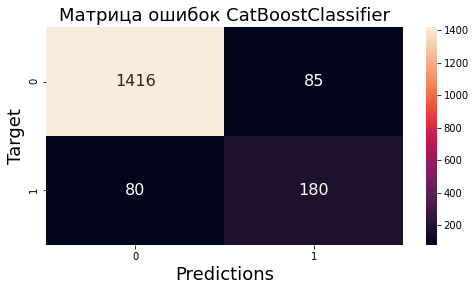

In [84]:
#предсказания модели
predictions_cbc = model_catboost.predict(X_test)

#создание матрицы ошибок
cm_cbc = confusion_matrix(y_test, predictions_cbc)
cm_cbc_data = pd.DataFrame(cm_cbc, index=['0', '1'], columns=['0', '1'])

#визуализация матрицы ошибок
plt.figure(figsize=(8, 4))
sns.heatmap(cm_cbc, 
            xticklabels=cm_cbc_data.columns, 
            yticklabels=cm_cbc_data.index, 
            annot=True, 
            fmt='g', 
            annot_kws={"size": 16})
plt.title("Матрица ошибок CatBoostClassifier", size=18)
plt.xlabel('Predictions', size=18)
plt.ylabel('Target', size=18)
plt.show()

True Negative (TN = 1397): 
Модель правильно предсказала, что 1397 клиентов остались в компании. Это хорошие результаты, так как модель смогла точно определить значительное количество клиентов, которые не покинули компанию.

True Positive (TP = 176): 
Модель правильно предсказала, что 176 клиентов ушли из компании. Это успешное выявление случаев оттока, что важно для предотвращения потери клиентов.

False Positive (FP = 82): 
Модель ошибочно предсказала, что 82 клиента ушли, хотя на самом деле они остались. Такие ошибки могут привести к ненужным затратам на удержание клиентов, которые и так не планировали уходить.

False Negative (FN = 106): 
Модель ошибочно предсказала, что 106 клиентов остались, хотя на самом деле они ушли. Это более серьезный тип ошибки, так как компания упустила возможность принять меры для удержания этих клиентов.

Использовуем SHAP для анализа важности признаков лучшей модели.

In [85]:
X_train_transformed = model_catboost.named_steps['preprocessor'].transform(X_train)
X_test_transformed = model_catboost.named_steps['preprocessor'].transform(X_test)


feature_names = model_catboost.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)


X_train_shap = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_shap = pd.DataFrame(X_test_transformed, columns=feature_names)


explainer = shap.TreeExplainer(model_catboost.named_steps['classifier'])


shap_values = explainer.shap_values(X_test_shap)


shap_obj = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_shap
)

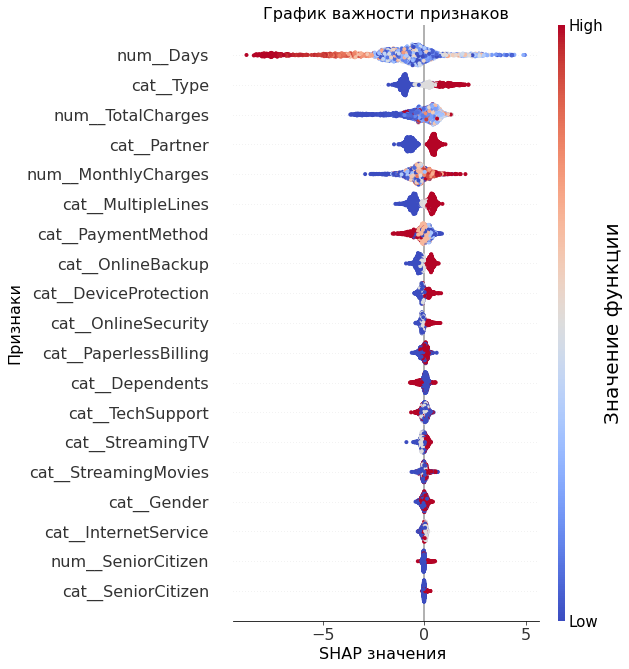

In [86]:
#визуализация суммарного графика важности признаков с кастомизацией
shap.summary_plot(shap_values, X_test_shap, cmap="coolwarm", show=False)

fig, ax = plt.gcf(), plt.gca()

#настройка параметров основного графика
ax.tick_params(labelsize=16) 
ax.set_xlabel("SHAP значения ", fontsize=16) 
ax.set_ylabel("Признаки", fontsize=16)
ax.set_title("График важности признаков", fontsize=16)  

#настройка цветовой шкалы
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)  
cb_ax.set_ylabel("Значение функции", fontsize=20) 

plt.show()

Клиенты с коротким сроком обслуживания (Days) подвержены большему риску оттока. Рекомендуется разработать программы лояльности или персонализированные предложения для новых пользователей.

Высокие расходы повышают вероятность оттока. Рекомендуется рассмотреть более гибкие тарифные планы или скидки для клиентов с высокими платежами.

Клиенты, использующие электронные чеки, чаще уходят. Возможно, стоит улучшить удобство и надежность этого метода.

Двухлетние контракты заметно снижают вероятность оттока. Нужно разработать маркетинговые кампании, направленные на переход клиентов на долгосрочные планы.

## Шаг 8. Общий вывод


В ходе проекта были выполнены следующие задачи:

- Лучшей моделью стал градиентный бустинг CatBoostRegressor, который соответствует требованиям по скорости и точности. Производительность на тестовой выборке продемонстрировала высокую стабильность и соответствие целям проекта. По итогам предсказаний достигнут AUC-ROC на уровне 0.9.

- Анализ матрицы ошибок показывает, что модель эффективно определяет как оставшихся, так и ушедших клиентов, но при этом допускает определённое количество ошибок.

Рекомендации по улучшению:
- Увеличить объём данных за счёт более продолжительного периода их сбора.
- Добавить искусственные наблюдения для обработки модели.
- Включить в анализ данные об использовании тарифов клиентами. Это поможет лучше понять их поведение и выявить точки для улучшения.
- Провести опросы клиентов, разрывающих договоры, чтобы выявить слабые стороны компании. Эти данные, даже в ограниченных объёмах, могут быть ценным источником информации для оптимизации услуг.
- Применение указанных мер может дать дополнительный импульс маркетологам, аналитикам и инженерам для улучшения качества услуг и удержания клиентов.


Рекомендации на основе анализа оценки важности признаков:

- Клиенты с коротким сроком обслуживания (Days) подвержены большему риску оттока. Рекомендуется разработать программы лояльности или персонализированные предложения для новых пользователей.

- Высокие ежемесячные платежи повышают вероятность оттока. Рекомендуется рассмотреть более гибкие тарифные планы или скидки для клиентов с высокими платежами.

- Клиенты, использующие электронные чеки, чаще уходят. Возможно, стоит улучшить удобство и надежность этого метода.

- Двухлетние контракты заметно снижают вероятность оттока. Нужно разработать маркетинговые кампании, направленные на переход клиентов на долгосрочные планы.